# Crear CSV de comandes

In [74]:
# pip install pandas faker


In [75]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta
import numpy as np

fake = Faker()

# Crear una lista para almacenar los datos
data = []

# Generar 5000 registros de datos ficticios
for i in range(5000):
    tipo = np.random.choice(['Comida', 'Biblioteca', 'Tienda'], p=[2, 0.8, 0.5] / np.sum([2, 0.8, 0.5]))
    if tipo == 'Biblioteca':
        precio = 0
        hours = random.randint(1,8)
        articulo = fake.word(ext_word_list=['Libro', 'Guía', 'Título de libro', 'Revista', 'Enciclopedia', 'Artículo académico'])

    elif tipo == 'Comida':
        precio = round(random.uniform(5, 25), 2)
        hours = random.randint(0,4)
        articulo = fake.word(ext_word_list=['Pizza 4 quesos', 'Hamburguesa', 'Sushi', 'Ensalada de frutas', 'Burritos', 'Tacos', 'Pollo a la parrilla', 'Pasta carbonara', 'Tarta de manzana', 'Paella', 'Ramen', 'Bagel', 'Fish and chips', 'Sándwich de pollo', 'Tostadas con aguacate', 'Empanadas', 'Ceviche', 'Pollo al curry', 'Wrap de pollo', 'Calzone', 'Hot dog', 'Sopa de miso', 'Tortilla española', 'Crepes', 'Tiramisú', 'Albóndigas', 'Chili con carne', 'Poke bowl'])

    else:
        precio = round(random.uniform(1, 10), 2)
        hours = random.randint(1,23)
        articulo = fake.word(ext_word_list=['Impresora', 'Posits', 'Papel', 'Teclado inalámbrico', 'Altavoces Bluetooth', 'Memoria USB', 'Caja de herramientas', 'Pinturas al óleo', 'Mochila', 'Estación de carga', 'Cámara web', 'Botella de agua', 'Lámpara de escritorio', 'Gafas de lectura', 'Maletín ejecutivo', 'Auriculares inalámbricos', 'Bolsa térmica'])

    fecha_inicio = fake.date_time_this_year()
    fecha_entrega = fake.date_time_between_dates(datetime_start=fecha_inicio, datetime_end=fecha_inicio + timedelta(hours=hours))

    data.append([
        i,
        1,
        2,
        fake.word(ext_word_list=['ingenieria', 'ciencias', 'biociencias', 'comunicacion', 'ciencias politicas', 'derecho', 'economia', 'medicina', 'filosofia', 'psicologia', 'traduccion', 'veterinaria', 'doctorado']),
        fake.word(ext_word_list=['ingenieria', 'ciencias', 'biociencias', 'comunicacion', 'ciencias politicas', 'derecho', 'economia', 'medicina', 'filosofia', 'psicologia', 'traduccion', 'veterinaria', 'doctorado']),
        precio,
        tipo,
        articulo,
        fecha_inicio,
        fecha_entrega,
        np.random.choice(['espera', 'activo', 'finalizado'], p=[0.3, 0.8, 2] / np.sum([0.3, 0.8, 2]))
    ])

# Crear un DataFrame de pandas
df = pd.DataFrame(data, columns=[
    'Id_comanda', 'Niu_client', 'Niu_repartidor', 'Facultad_destino', 'Facultat_Origen',
    'Precio', 'Tipo', 'Articulo', 'fecha_inicio', 'fecha_entrega', 'Estado'
])

# Guardar el DataFrame en un archivo CSV
df.to_csv('comandas.csv', index=False)


## Precio promedio por tipo de artículo:

In [76]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')

# Calcular el precio promedio por tipo de artículo
promedio_por_tipo = df.groupby('Tipo')['Precio'].mean()

print(promedio_por_tipo)


Tipo
Biblioteca     0.000000
Comida        14.921128
Tienda         5.510598
Name: Precio, dtype: float64


## Número de comandas por estado:

In [77]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')

# Contar el número de comandas por estado
comandas_por_estado = df['Estado'].value_counts()

print(comandas_por_estado)


finalizado    3206
activo        1282
espera         512
Name: Estado, dtype: int64


## Artículo más caro y más barato:

In [78]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')

# Encontrar el artículo más caro y más barato
articulo_mas_caro = df.loc[df['Precio'].idxmax()]['Articulo']
articulo_mas_barato = df.loc[df['Precio'].idxmin()]['Articulo']

print("Artículo más caro:", articulo_mas_caro)
print("Artículo más barato:", articulo_mas_barato)


Artículo más caro: Fish and chips
Artículo más barato: Guía


## Facultad con más comandas realizadas:

In [79]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')

# Encontrar la facultad con más comandas realizadas
facultad_mas_comandas = df['Facultat_Origen'].value_counts().idxmax()

print("Facultad con más comandas realizadas:", facultad_mas_comandas)


Facultad con más comandas realizadas: doctorado


## Gráfico de barras para mostrar el número de comandas por tipo:

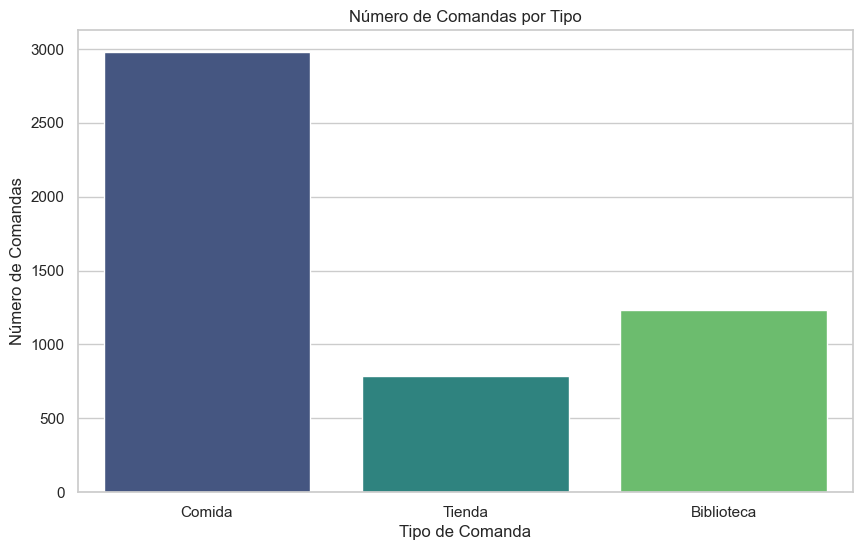

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo', data=df, palette='viridis')
plt.title('Número de Comandas por Tipo')
plt.xlabel('Tipo de Comanda')
plt.ylabel('Número de Comandas')
plt.show()


## Gráfico de pastel para mostrar la distribución de estados de las comandas:

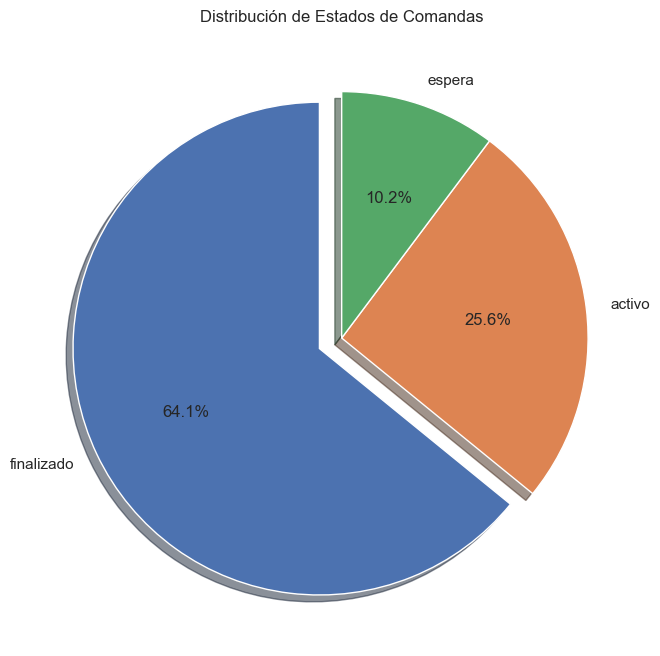

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
df['Estado'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0), shadow=True)
plt.title('Distribución de Estados de Comandas')
plt.ylabel('')
plt.show()


## Gráfico de caja para mostrar la distribución de precios por tipo de artículo:

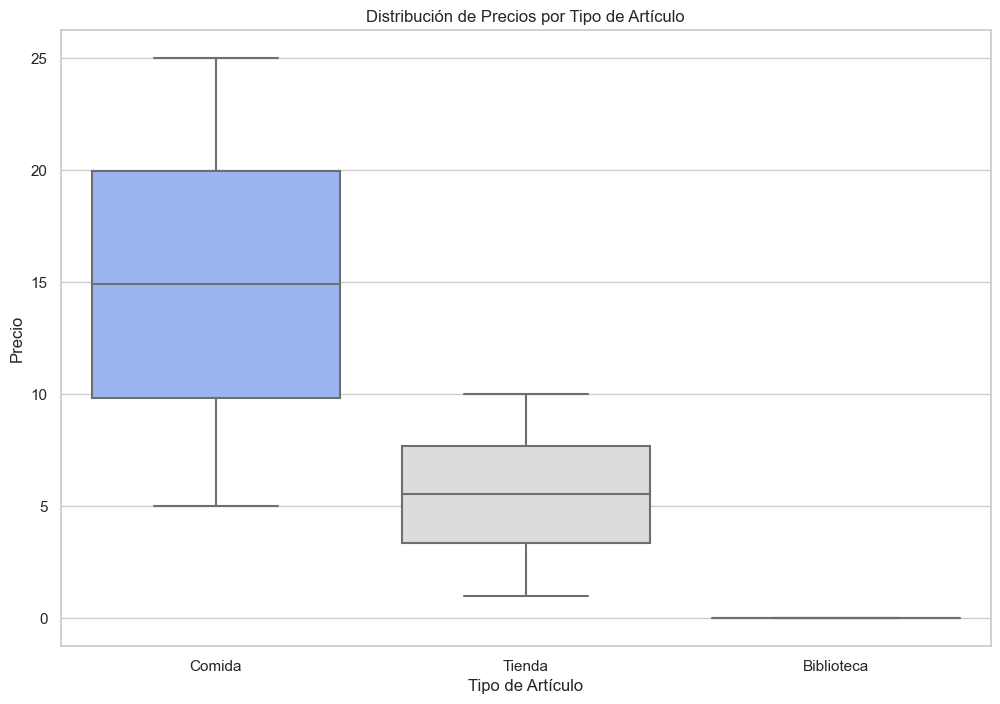

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')

# Crear un gráfico de caja
plt.figure(figsize=(12, 8))
sns.boxplot(x='Tipo', y='Precio', data=df, palette='coolwarm')
plt.title('Distribución de Precios por Tipo de Artículo')
plt.xlabel('Tipo de Artículo')
plt.ylabel('Precio')
plt.show()


## Donde Mas se pide

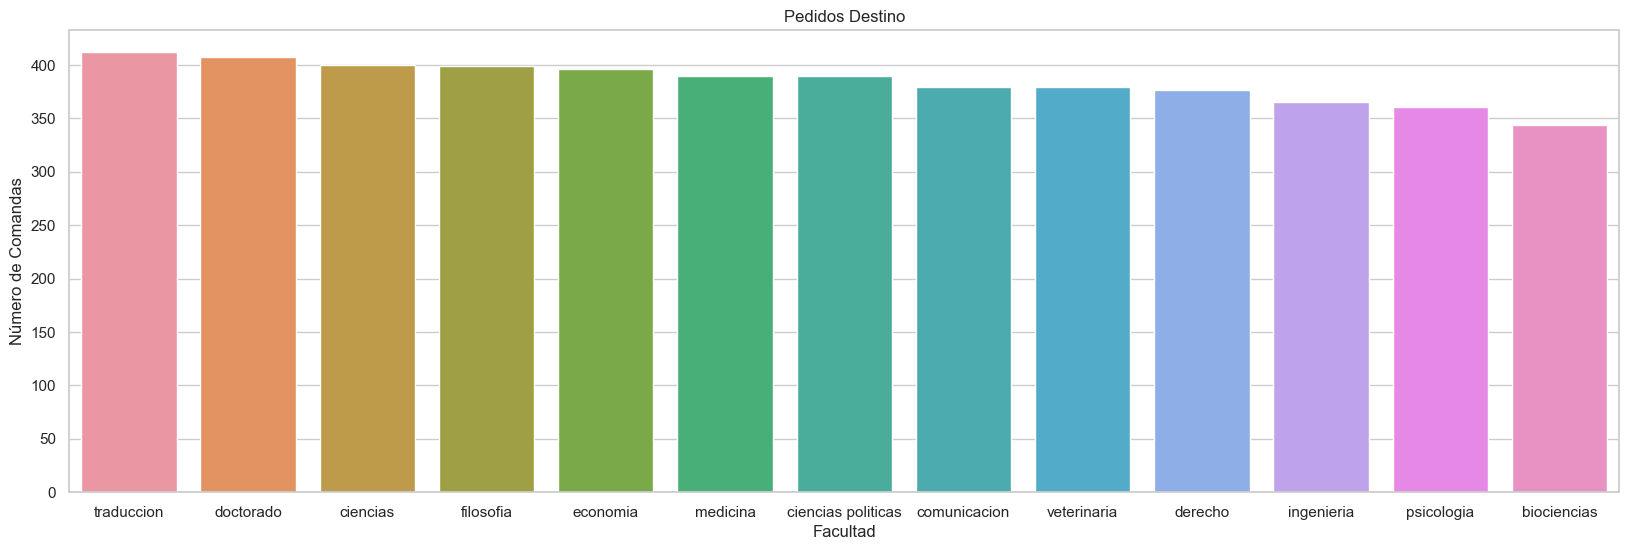

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')
counts = df['Facultad_destino'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(20, 6))
sns.countplot(x='Facultad_destino', data=df, order= counts.index)
plt.title('Pedidos Destino')
plt.xlabel('Facultad')
plt.ylabel('Número de Comandas')
plt.show()

## Facultades donde Reciben mas pedidos

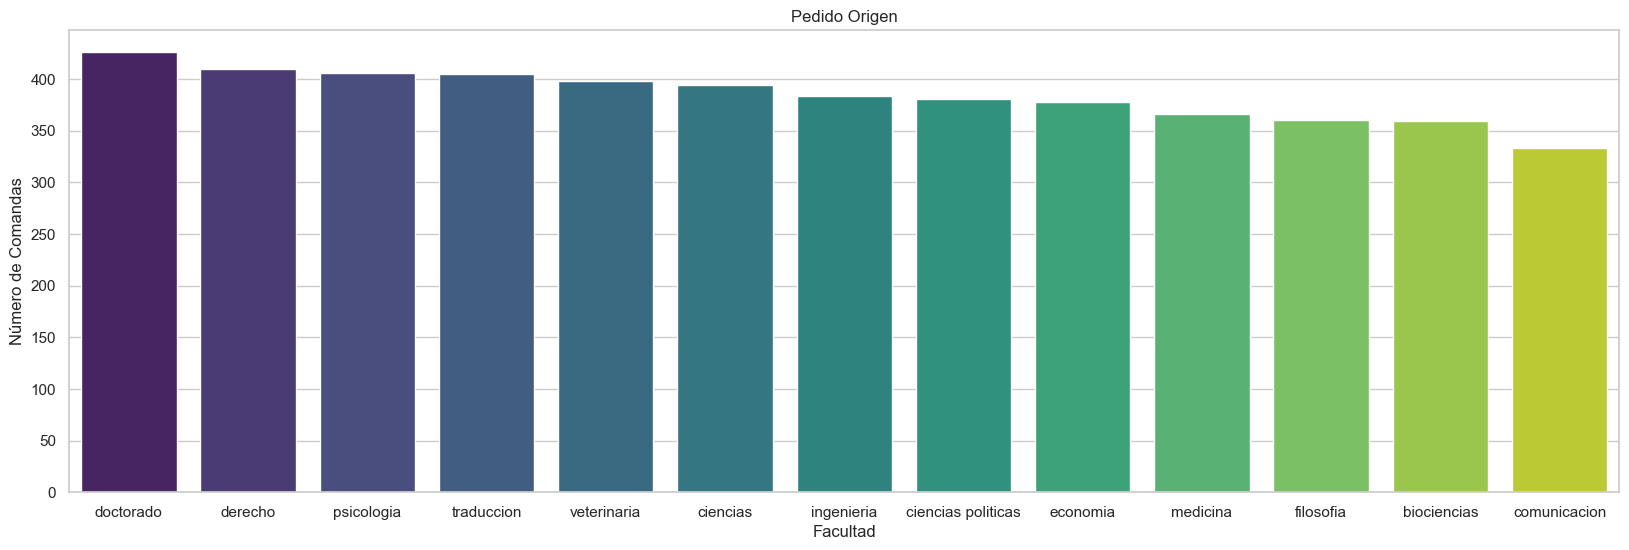

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('comandas.csv')
counts = df['Facultat_Origen'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(20, 6))
sns.countplot(x='Facultat_Origen', data=df, palette='viridis', order= counts.index)
plt.title('Pedido Origen')
plt.xlabel('Facultad')
plt.ylabel('Número de Comandas')
plt.show()

## Tiempo de entrega de un pedido

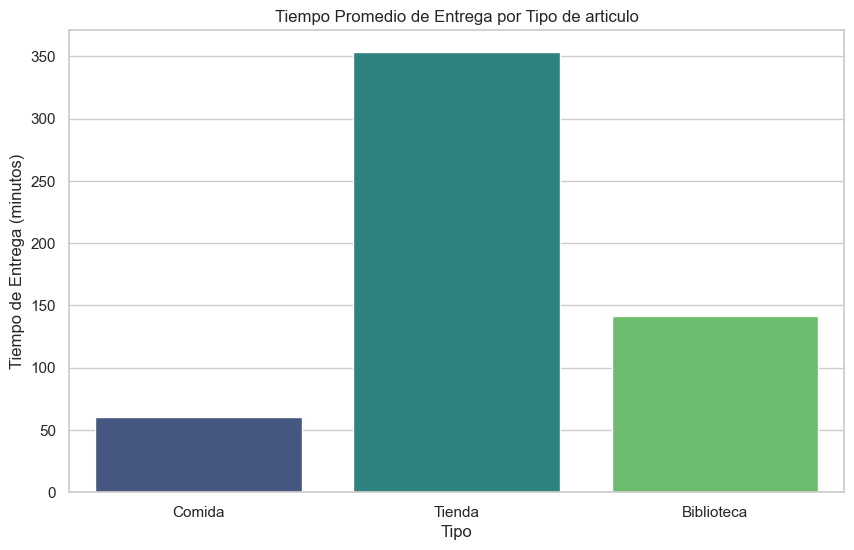

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('comandas.csv')

# Calcular la diferencia de tiempo en minutos
df['Tiempo_Entrega_Minutos'] = (pd.to_datetime(df['fecha_entrega']) - pd.to_datetime(df['fecha_inicio'])).dt.total_seconds() / 60

# Crear un gráfico de barras con la media del tiempo de entrega por estado
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tipo', y='Tiempo_Entrega_Minutos', data=df, ci=None, palette='viridis')
plt.title('Tiempo Promedio de Entrega por Tipo de articulo')
plt.ylabel('Tiempo de Entrega (minutos)')
plt.show()
